In [1]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier


In [2]:
CREATE_EMBEDDINGS = True

if CREATE_EMBEDDINGS:

    from data import get_images, IMG_SIZE
    from classification import get_embeddings
    from models import embedding_network_contrastive
    import tensorflow as tf

    DATASET_DIR = "../../data/dataset_condensed/cropped_head/direction"

    with open("../../data/classes_condensed_head.txt") as file:
        classes = [line.strip() for line in file]

        X, y = get_images(DATASET_DIR, classes, IMG_SIZE)

        X = np.array(X)
        X = tf.keras.applications.inception_v3.preprocess_input(X)
        y = np.array(y)

        embedding_model = embedding_network_contrastive
        embedding_model.load_weights('../models/embedding')
        X_embeddings, y_embeddings = get_embeddings(embedding_model, X, y)

        columns = ["x" + str(i) for i in range(128)] + ["y"]
        df = pd.DataFrame(np.column_stack([X_embeddings, y_embeddings]), columns=columns)
        df = df.astype({"y": int})
        df.to_csv("../embeddings/embeddings.csv", index=False)

else:

    CSV_FILE = '../embeddings/embeddings.csv'

    df = pd.read_csv(CSV_FILE)

    df.head()

In [3]:
df = df.astype({"y": int})
df.describe()

,x0,x1,x2,x3,x4,x5,x6,x7,x8,x9,...,x119,x120,x121,x122,x123,x124,x125,x126,x127,y
count,776.000000,776.000000,776.000000,776.000000,776.000000,776.000000,776.000000,776.000000,776.000000,776.000000,...,776.000000,776.000000,776.000000,776.000000,776.000000,776.000000,776.000000,776.000000,776.000000,776.000000
mean,-1.580643,1.886594,-1.294836,-2.753432,-1.530609,-0.198449,-1.961862,0.622443,1.465714,0.866251,...,0.980997,-1.525013,-0.249680,1.515307,-1.607537,2.484599,1.355541,0.266241,-1.880279,183.336340
std,1.212779,1.181101,1.036478,1.409292,1.384542,1.047000,1.085437,1.146657,1.191334,1.157407,...,1.407745,1.207306,1.024057,1.258974,1.021047,1.293282,1.263783,1.191311,1.331777,105.163573
min,-5.288712,-1.304541,-4.468631,-7.392676,-6.901470,-3.476775,-5.803153,-3.706673,-2.083639,-2.190080,...,-3.437890,-6.366967,-3.261271,-2.807458,-5.520463,-1.344311,-2.278151,-3.896511,-6.681166,0.000000
25%,-2.266484,1.024690,-1.984075,-3.711560,-2.368493,-0.866291,-2.660437,-0.110326,0.641197,0.031271,...,-0.034562,-2.340691,-1.008168,0.662490,-2.222865,1.523992,0.574024,-0.466008,-2.769439,93.000000
50%,-1.498536,1.828364,-1.323772,-2.696730,-1.366023,-0.192818,-1.893884,0.541832,1.479643,0.768880,...,0.901025,-1.484152,-0.198054,1.523568,-1.568647,2.461904,1.308061,0.290502,-1.793510,183.000000
75%,-0.713117,2.694069,-0.602147,-1.692340,-0.589294,0.540897,-1.207903,1.330487,2.270771,1.667749,...,1.920396,-0.760820,0.420725,2.369494,-0.951550,3.381771,2.121021,1.000578,-0.883325,274.000000
max,2.693988,5.765711,2.078054,1.370822,1.874336,2.498098,1.543143,4.510909,4.962124,4.675804,...,5.330960,2.585363,3.062413,4.769176,1.906848,6.446350,5.867248,4.646328,1.489502,365.000000


In [4]:
unique_values = len(df.y.unique())
unique_values

366

In [5]:
feature_count = len(df.columns) - 1
feature_count

128

In [6]:
all_zeros = (df == 0).all()
non_zero = np.where(all_zeros == False)[0]
len(non_zero)

129

In [7]:
pca = PCA(n_components=3)
pca_result = pca.fit_transform(df)

#feat_cols = [ 'x'+str(i) for i in range(feature_count) ]
df_pca = df.copy()
df_pca['y'] = df['y']
df_pca['pca-one'] = pca_result[:,0]
df_pca['pca-two'] = pca_result[:,1]
df_pca['pca-three'] = pca_result[:,2]
df_pca.head()

,x0,x1,x2,x3,x4,x5,x6,x7,x8,x9,...,x122,x123,x124,x125,x126,x127,y,pca-one,pca-two,pca-three
0,-1.580196,0.497429,-1.199172,-3.075532,-2.724760,-0.536134,-2.887772,1.328678,0.243191,1.397895,...,1.327920,-1.098392,0.808501,2.369081,-0.773997,-0.844430,0,183.360691,-4.447418,0.009909
1,0.833797,0.754561,-0.182204,-0.866810,-0.211057,-1.186238,-0.817577,0.163213,1.421941,0.920884,...,0.604927,-0.882982,0.219219,1.126130,-0.060302,-0.350362,0,183.365388,-11.170239,-3.592291
2,-0.458226,1.406522,-2.580240,-3.895553,-0.395577,2.404485,-1.158793,0.990488,-0.642408,2.739793,...,-0.130905,-1.282437,3.721196,1.840928,-1.967001,-2.091344,1,182.376904,-2.294140,4.653409
3,-2.058798,1.645112,-1.490084,-3.232563,-1.657016,-0.387320,-0.704019,-0.204292,0.494748,1.842393,...,0.318475,-2.280127,3.006347,2.605170,-1.079225,-1.069444,1,182.390274,-6.577974,-1.793846
4,-1.245571,0.786113,-1.365676,-1.909014,-1.030897,0.540705,-0.903304,-0.351218,-0.061604,0.042797,...,1.752274,-0.685727,1.873309,1.034045,0.466316,-0.602398,2,181.343701,-4.639625,1.196285


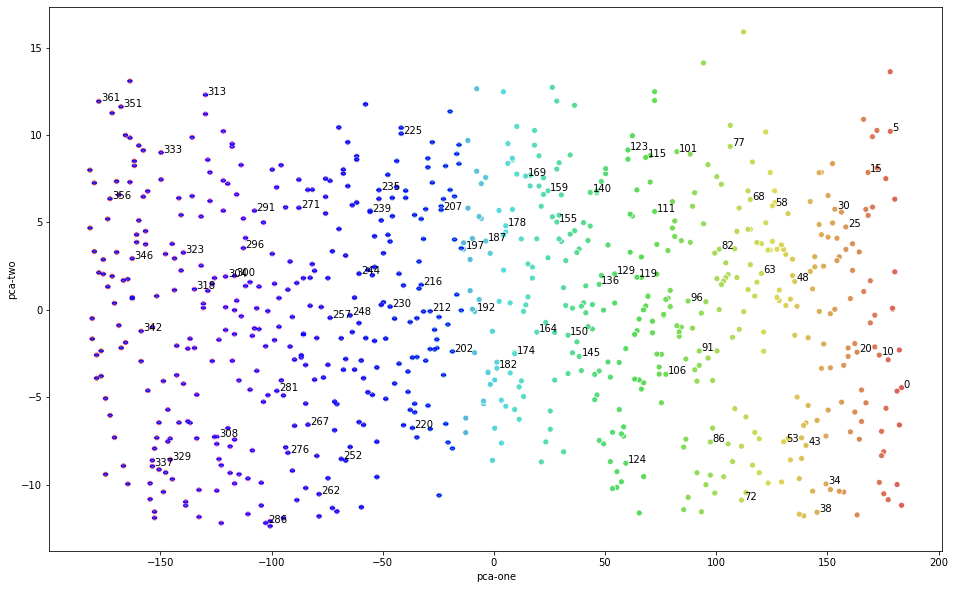

In [8]:
plt.figure(figsize=(16,10))
p = sns.scatterplot(
    x="pca-one", y="pca-two",
    hue="y",
    palette=sns.color_palette("hls", unique_values),
    data=df_pca,
    legend=False
)

for i in range(0, df_pca.shape[0], 10):
     p.text(df_pca["pca-one"][i]+1.0, df_pca["pca-two"][i],
     df_pca["y"][i], horizontalalignment='left',
     size='medium', color='black')

from matplotlib.patches import Ellipse
ax = plt.gca()
for i in range(0, df_pca.shape[0]):
    if df_pca["y"][i] > 197:
        circle = Ellipse((df_pca["pca-one"][i], df_pca["pca-two"][i]), width=2.0, height=0.1, color='b', fill=False)
        ax.add_artist(circle)

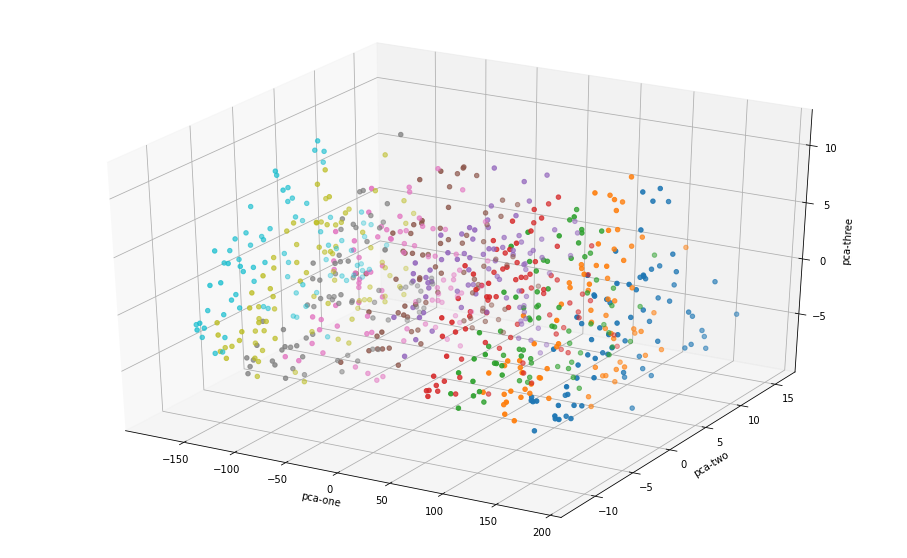

In [9]:
ax = plt.figure(figsize=(16,10)).gca(projection='3d')
ax.scatter(
    xs=df_pca["pca-one"],
    ys=df_pca["pca-two"],
    zs=df_pca["pca-three"],
    c=df_pca["y"],
    cmap='tab10'
)
ax.set_xlabel('pca-one')
ax.set_ylabel('pca-two')
ax.set_zlabel('pca-three')

plt.show()

In [10]:
#tsne = TSNE(n_components=2, verbose=1, perplexity=40, n_iter=300)
tsne = TSNE(n_components=2, verbose=1, perplexity=40, n_iter=1000)
tsne_results = tsne.fit_transform(df)

df_pca['tsne-2d-one'] = tsne_results[:,0]
df_pca['tsne-2d-two'] = tsne_results[:,1]

[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 776 samples in 0.012s...
[t-SNE] Computed neighbors for 776 samples in 0.040s...
[t-SNE] Computed conditional probabilities for sample 776 / 776
[t-SNE] Mean sigma: 8.879016
[t-SNE] KL divergence after 250 iterations with early exaggeration: 50.002178
[t-SNE] KL divergence after 1000 iterations: 0.336082


In [11]:
with open("../../data/classes_condensed_head.txt") as file:
    classes = [line.strip() for line in file]

df_pca["class"] = df_pca["y"].apply(lambda x: classes[x])
df_pca

,x0,x1,x2,x3,x4,x5,x6,x7,x8,x9,...,x125,x126,x127,y,pca-one,pca-two,pca-three,tsne-2d-one,tsne-2d-two,class
0,-1.580196,0.497429,-1.199172,-3.075532,-2.724760,-0.536134,-2.887772,1.328678,0.243191,1.397895,...,2.369081,-0.773997,-0.844430,0,183.360691,-4.447418,0.009909,17.425940,28.754448,204295_l
1,0.833797,0.754561,-0.182204,-0.866810,-0.211057,-1.186238,-0.817577,0.163213,1.421941,0.920884,...,1.126130,-0.060302,-0.350362,0,183.365388,-11.170239,-3.592291,16.933277,27.906479,204295_l
2,-0.458226,1.406522,-2.580240,-3.895553,-0.395577,2.404485,-1.158793,0.990488,-0.642408,2.739793,...,1.840928,-1.967001,-2.091344,1,182.376904,-2.294140,4.653409,18.117050,28.850986,204295_r
3,-2.058798,1.645112,-1.490084,-3.232563,-1.657016,-0.387320,-0.704019,-0.204292,0.494748,1.842393,...,2.605170,-1.079225,-1.069444,1,182.390274,-6.577974,-1.793846,17.544449,28.118093,204295_r
4,-1.245571,0.786113,-1.365676,-1.909014,-1.030897,0.540705,-0.903304,-0.351218,-0.061604,0.042797,...,1.034045,0.466316,-0.602398,2,181.343701,-4.639625,1.196285,17.166685,29.135929,209700_l
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
771,-1.623605,1.116487,-1.539778,-3.419530,-2.206398,-0.855619,-1.316033,2.970212,-0.052875,1.476612,...,0.910644,-2.654703,-0.432385,129,54.335181,0.394140,-3.141309,-17.864227,13.001286,67516_r
772,-0.092072,0.439186,0.014212,-0.924275,-1.296866,-0.506557,-0.996605,0.430567,0.614447,-1.022240,...,0.315030,-0.073477,-0.211434,130,53.361497,-10.212235,-3.781878,-16.159901,11.397779,67908_l
773,0.092526,1.100785,0.087813,-3.226437,-2.367285,-0.287654,-1.562672,0.281914,-0.293261,1.808531,...,0.267290,-2.920305,-3.178441,130,53.371221,-6.996025,0.992369,-16.705462,10.863008,67908_l
774,-1.001965,-0.035949,-1.372336,-0.191785,-2.563363,0.295496,-0.369208,-0.106010,1.242392,-0.501848,...,0.667058,-0.651356,0.255683,131,52.374455,-8.676790,-4.446292,-16.479750,11.483665,67908_r


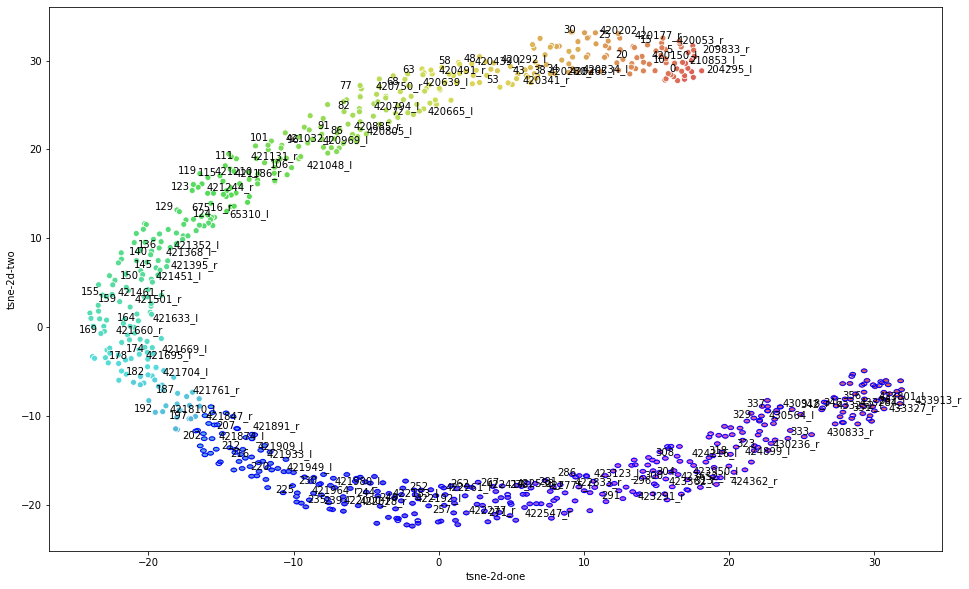

In [12]:
plt.figure(figsize=(16,10))
p1 = sns.scatterplot(
    x="tsne-2d-one", y="tsne-2d-two",
    hue="y",
    palette=sns.color_palette("hls", unique_values),
    data=df_pca,
    legend=False
)

for i in range(0, df_pca.shape[0], 10):
     p1.text(df_pca["tsne-2d-one"][i]+1.0, df_pca["tsne-2d-two"][i],
     df_pca["class"][i], horizontalalignment='left',
     size='medium', color='black')
     p1.text(df_pca["tsne-2d-one"][i]-1.5, df_pca["tsne-2d-two"][i],
     df_pca["y"][i], horizontalalignment='left',
     size='medium', color='black')

ax = plt.gca()
for i in range(0, df_pca.shape[0]):
    if df_pca["y"][i] > 197:
        circle = plt.Circle((df_pca["tsne-2d-one"][i], df_pca["tsne-2d-two"][i]), 0.2, color='b', fill=False)
        ax.add_artist(circle)

plt.savefig("tsne.png")

In [13]:
df_pca_portion = df_pca[df_pca['pca-two'] > 0]
selected_classes = list(df_pca_portion["class"])
selected_classes = [c.split("_")[1] for c in selected_classes]
from collections import Counter
cnt = Counter(selected_classes)
tup = zip(cnt.keys(), cnt.values())
for t in tup:
    print(t)

('r', 276)
('l', 126)


In [14]:
df_mean = df.groupby("y").mean()
df_mean.iloc[:,:5]

,x0,x1,x2,x3,x4
y,,,,,
0,-0.373200,0.625995,-0.690688,-1.971171,-1.467909
1,-1.258512,1.525817,-2.035162,-3.564058,-1.026296
2,-0.765259,0.939932,-0.908026,-2.024438,-0.652046
3,-1.225956,1.302645,-1.514602,-2.645352,-3.030191
4,-2.015600,2.064323,-1.747899,-2.612218,-1.391215
...,...,...,...,...,...
361,-1.523820,3.530988,-1.719033,-2.524726,-1.640023
362,-0.957711,2.366557,-2.028423,-2.442308,-0.845634
363,-1.952494,2.460930,-1.256156,-0.433183,-0.017766


In [15]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, f1_score, classification_report, confusion_matrix

X = df.iloc[:, :-1].to_numpy()
y = df.iloc[:, -1].to_numpy()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, shuffle=True)

In [16]:
model = SVC(kernel='linear', probability=True, C=1.0)
#model = KNeighborsClassifier(n_neighbors=1)
model.fit(X_train, y_train)
predictions = model.predict(X_test)
print(accuracy_score(predictions, y_test))
#print(classification_report(predictions, y_test))
#print(confusion_matrix(predictions, y_test))

0.012875536480686695


In [17]:
df_mean['similarity'] = np.linalg.norm(df_mean.iloc[:, :feature_count].sub(X_test[0]), axis=1)
df_mean = df_mean.sort_values("similarity", ascending=True)
y = df_mean['similarity'].idxmin()
df_mean

,x0,x1,x2,x3,x4,x5,x6,x7,x8,x9,...,x119,x120,x121,x122,x123,x124,x125,x126,x127,similarity
y,,,,,,,,,,,,,,,,,,,,,
164,-2.488758,1.765674,-0.998794,-2.725963,-1.655762,-0.153339,-2.528525,0.950116,1.810466,0.927913,...,0.242414,-2.326728,-0.271419,1.790905,-1.324430,2.162653,2.337412,0.538710,-2.354727,6.600150
94,-2.166804,2.652551,-1.703499,-4.046557,-3.010847,-0.392741,-2.977323,0.661785,1.767863,0.996100,...,0.376513,-3.409535,-0.135716,1.953625,-1.956383,2.692708,2.646108,0.842745,-2.497822,7.404198
324,-1.961915,3.380608,-0.401732,-3.146005,-2.123881,0.582354,-2.970470,1.413802,2.535382,3.320207,...,1.043736,-0.898714,-0.637952,0.393121,-2.526871,2.376912,1.747190,0.770788,-3.401058,9.929150
244,-1.467370,1.335774,-1.981553,-3.077801,-2.341112,-0.297269,-3.143268,0.298436,1.934070,0.263097,...,0.598901,-1.813162,-0.633929,1.979383,-1.997669,1.301603,2.046323,-0.195937,-2.482286,10.162172
140,-2.282477,2.920545,-1.616873,-5.744885,-4.037878,-0.903145,-3.719250,1.343766,2.293016,1.963973,...,0.618959,-2.229522,0.584311,1.819328,-0.914658,3.311375,2.470763,1.017026,-3.724147,10.439039
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
111,-1.048043,1.758775,0.937657,-2.984996,0.149469,0.079238,-2.409439,0.647141,3.711189,0.525905,...,4.246882,-3.557435,-0.779460,-0.180066,-2.760573,3.991275,-0.951833,2.068574,-3.059430,18.875797
46,-0.123017,0.966333,-0.945467,-1.246458,-0.458923,0.043498,-0.979345,0.290276,0.669758,-0.477153,...,-0.734982,-0.833234,-1.249517,0.257994,-0.711530,0.324298,0.283856,-0.028257,-0.215847,18.936882
322,-0.370612,0.882171,-0.209428,-1.586122,-0.710054,0.097666,-0.648629,0.301406,1.344661,0.660855,...,-0.680143,-0.212529,-1.566171,0.862618,-1.184548,1.738621,0.739442,-0.582581,-0.466559,18.957786


In [18]:
df['distance'] = np.linalg.norm(df.iloc[:, :feature_count].sub(X_test[0]), axis=1)
df = df.sort_values("distance", ascending=True)
idx = df['distance'].idxmin()
y = df["y"][idx]
print("predicted: ", y, "| actual: ", y_test[0])
df.head()

predicted:  164 | actual:  164


,x0,x1,x2,x3,x4,x5,x6,x7,x8,x9,...,x120,x121,x122,x123,x124,x125,x126,x127,y,distance
329,-3.077623,2.377125,-1.350078,-3.525656,-3.414136,-0.630380,-3.093111,1.108717,1.527279,1.604537,...,-2.271450,-0.201328,1.574982,-1.968735,2.522964,2.931213,0.894910,-3.503349,164,0.000000
195,-1.486717,2.588365,-1.936146,-4.040277,-2.098878,-0.232291,-2.400742,0.812261,2.091846,0.148720,...,-3.103529,-0.248314,1.272071,-0.697902,2.202908,1.730879,1.901491,-1.044259,94,10.105278
196,-2.846891,2.716737,-1.470851,-4.052837,-3.922816,-0.553192,-3.553905,0.511309,1.443880,1.843481,...,-3.715541,-0.023119,2.635179,-3.214864,3.182509,3.561337,-0.216001,-3.951385,94,10.156740
45,-1.883139,2.025452,-1.884506,-2.099809,-3.383935,1.206741,-2.212644,0.529756,1.145561,1.883412,...,-3.558358,0.115406,1.923251,-2.600986,4.652317,2.523349,0.717621,-3.348051,22,11.156769
609,-2.685793,2.449189,-1.431522,-3.759571,-3.155860,-0.399242,-3.013850,0.621599,2.908724,1.820454,...,-1.434758,0.073345,1.963716,-3.229565,2.437330,1.803841,0.902646,-2.362500,296,11.225571


In [19]:
distances = []

for x in X_test:
    X_test_distance = np.linalg.norm(np.subtract(X_train[:, :feature_count], x), axis=1)
    least_distance = X_test_distance.min()
    distances.append(least_distance)

distances = np.array(distances)
distance_average = distances.mean()
distance_average

11.342998419767042

In [20]:
from sklearn.pipeline import make_pipeline

clf = make_pipeline(PCA(n_components=3), SVC(kernel='linear'))
clf.fit(X_train, y_train)
predictions = clf.predict(X_test)
print(accuracy_score(predictions, y_test))

0.004291845493562232


In [21]:
y_test_neg = y_test.copy()

for i, y_test_i in enumerate(y_test):
    if y_test_i not in y_train:
        y_test_neg[i] = -1

negative_count = list(y_test_neg).count(-1)

print(str(negative_count) + "/" + str(len(y_test_neg)))


59/233


In [22]:
df = df.sort_values(by='y')
df

,x0,x1,x2,x3,x4,x5,x6,x7,x8,x9,...,x120,x121,x122,x123,x124,x125,x126,x127,y,distance
1,0.833797,0.754561,-0.182204,-0.866810,-0.211057,-1.186238,-0.817577,0.163213,1.421941,0.920884,...,0.312429,-1.478646,0.604927,-0.882982,0.219219,1.126130,-0.060302,-0.350362,0,20.222039
0,-1.580196,0.497429,-1.199172,-3.075532,-2.724760,-0.536134,-2.887772,1.328678,0.243191,1.397895,...,-0.715454,-0.897157,1.327920,-1.098392,0.808501,2.369081,-0.773997,-0.844430,0,15.365711
2,-0.458226,1.406522,-2.580240,-3.895553,-0.395577,2.404485,-1.158793,0.990488,-0.642408,2.739793,...,-0.409530,-0.209694,-0.130905,-1.282437,3.721196,1.840928,-1.967001,-2.091344,1,20.702671
3,-2.058798,1.645112,-1.490084,-3.232563,-1.657016,-0.387320,-0.704019,-0.204292,0.494748,1.842393,...,-0.691132,-2.765824,0.318475,-2.280127,3.006347,2.605170,-1.079225,-1.069444,1,19.746574
4,-1.245571,0.786113,-1.365676,-1.909014,-1.030897,0.540705,-0.903304,-0.351218,-0.061604,0.042797,...,-1.102884,0.474268,1.752274,-0.685727,1.873309,1.034045,0.466316,-0.602398,2,15.888248
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
755,-1.902584,2.699960,-1.188762,0.012839,0.698291,-0.633723,-0.098850,1.602412,2.572595,0.595449,...,-2.140533,-0.622287,1.794331,-1.099035,6.095111,0.625047,3.108793,-0.984677,363,17.749515
757,-1.456853,1.606589,-1.430665,-1.490778,-0.685903,0.849081,-1.360503,-0.693428,1.866924,1.075202,...,-2.332332,0.038954,1.856490,-0.714401,2.765595,1.261226,1.464804,-1.956025,364,13.930115
756,-2.803044,2.127140,-2.174640,-3.143354,-1.443020,0.377054,-2.223859,-0.543638,3.550138,1.682500,...,-1.446065,-0.417744,3.178476,-1.936496,1.795337,2.603100,1.022676,-0.326914,364,15.090607
758,-1.758837,0.468287,-1.793509,-4.412496,-0.530279,1.796688,-3.351716,-0.191102,4.065564,0.738494,...,-1.300047,-1.317206,1.875675,-2.409873,3.861166,3.227944,-0.179373,-4.391248,365,19.426230
